<a href="https://colab.research.google.com/github/rmaacario/Sports-Car-Price-Prediction/blob/main/Sports_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [4]:
df = pd.read_csv('Sport car price.csv')
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


# Data Preprocessing Part 1

In [5]:
df.select_dtypes(include='object').nunique()

Car Make                    38
Car Model                  176
Engine Size (L)             45
Horsepower                 124
Torque (lb-ft)              93
0-60 MPH Time (seconds)     43
Price (in USD)             367
dtype: int64

# Remove Comma from Price (in USD)

In [6]:
# remove commas from the Price column
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '')
# convert the Price column to integer
df['Price (in USD)'] = df['Price (in USD)'].astype(int)
df['Price (in USD)'].dtypes

dtype('int64')

In [7]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


# Change numerical data into integer

In [8]:
# remove commas from 0-60 MPH Time (seconds) column
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace(',', '')

# check if the Horsepower column contains string values
if df['Horsepower'].dtype == 'object':
    # remove strings from the Column A column
    df['Horsepower'] = df['Horsepower'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    df['Horsepower'] = df['Horsepower'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass

# check if the Horsepower column contains string values
if df['Torque (lb-ft)'].dtype == 'object':
    # remove strings from the Column A column
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].fillna(0)
    df['Torque (lb-ft)'] = df['Torque (lb-ft)'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass

# check if the Horsepower column contains string values
if df['0-60 MPH Time (seconds)'].dtype == 'object':
    # remove strings from the Column A column
    df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace('[^0-9]+', '', regex=True)

    # convert the remaining values to integers and fill empty strings with 0
    df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].apply(lambda x: int(x) if x != '' else 0)
else:
    # do something else if the Column A column does not contain string values
    pass


# Change numerical data into integer
df['Horsepower'] = df['Horsepower'].astype(int)
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].astype(int)
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].astype(float)

# convert the remaining values to integers and fill empty strings with 0
#df['Torque (lb-ft)'] = df['Torque (lb-ft)'].apply(lambda x: int(x) if x != '' else 0)

df.dtypes

Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)             object
Horsepower                   int64
Torque (lb-ft)               int64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
dtype: object

# Change Engine Size into integer

In [9]:
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [10]:
def segment_engine_size(engine_size):
    if engine_size in ['Electric', 'Hybrid']:
        return 'Electric/Hybrid'
    elif engine_size in ['Electric Motor', 'Electric (tri-motor)', 'Electric (93 kWh)', 'Electric (100 kWh)', '2.0 (Electric)']:
        return 'Electric'
    elif engine_size == '1.5 + Electric':
        return '1.5 Hybrid'
    elif engine_size in ['Hybrid (4.0)', '4.0 (Hybrid)']:
        return '4.0 Hybrid'
    elif engine_size == '0':
        return 'Unknown'
    elif engine_size == '-':
        return 'Unknown'
    elif float(engine_size) < 2:
        return 'Small'
    elif float(engine_size) < 3:
        return 'Medium'
    else:
        return 'Large'
df['Engine Size (L)'] = df['Engine Size (L)'].apply(segment_engine_size)

In [11]:
df['Engine Size (L)'].unique()

array(['Large', 'Medium', 'Electric/Hybrid', 'Electric', '1.5 Hybrid',
       'Small', 'Unknown', '4.0 Hybrid'], dtype=object)

<Axes: >

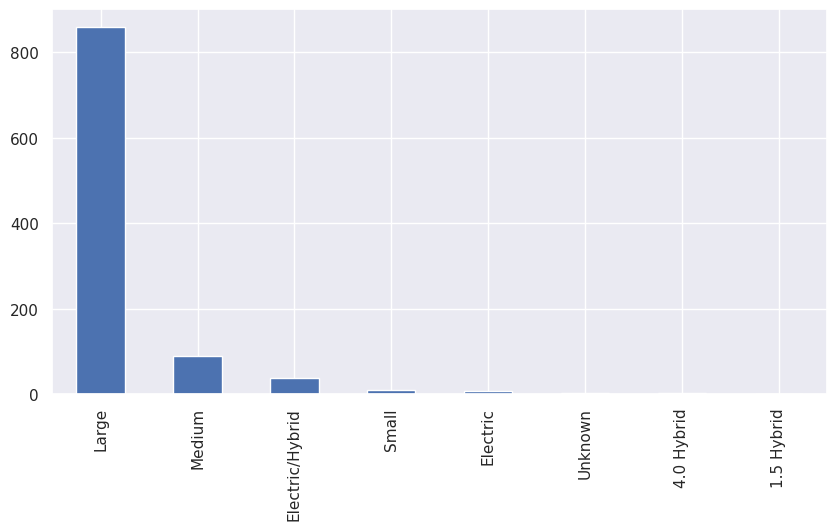

In [12]:
plt.figure(figsize=(10,5))
df['Engine Size (L)'].value_counts().plot(kind='bar')

# Remove Car Model because its irrelevant and have alot of unique value

In [13]:
df.drop(columns='Car Model', inplace=True)
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,2022,Large,379,331,4.0,101200
1,Lamborghini,2021,Large,630,443,28.0,274390
2,Ferrari,2022,Large,661,561,3.0,333750
3,Audi,2022,Large,562,406,32.0,142700
4,McLaren,2021,Large,710,568,27.0,298000


# Segment Car Make

In [14]:
df['Car Make'].unique()

array(['Porsche', 'Lamborghini', 'Ferrari', 'Audi', 'McLaren', 'BMW',
       'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Aston Martin',
       'Bugatti', 'Dodge', 'Jaguar', 'Koenigsegg', 'Lexus', 'Lotus',
       'Maserati', 'Alfa Romeo', 'Ariel', 'Bentley', 'Mercedes-AMG',
       'Pagani', 'Polestar', 'Rimac', 'Acura', 'Mazda', 'Rolls-Royce',
       'Tesla', 'Toyota', 'W Motors', 'Shelby', 'TVR', 'Subaru',
       'Pininfarina', 'Kia', 'Alpine', 'Ultima'], dtype=object)

In [15]:
# define a function to segment the values
def segment_car_make(value):
    if value in ['Porsche', 'Lamborghini', 'Ferrari', 'McLaren', 'Aston Martin', 'Bugatti', 'Koenigsegg', 'Lotus', 'Maserati', 'Alfa Romeo', 'Bentley', 'Mercedes-AMG', 'Pagani', 'Pininfarina']:
        return 'Luxury'
    elif value in ['Audi', 'BMW', 'Mercedes-Benz', 'Chevrolet', 'Ford', 'Nissan', 'Dodge', 'Jaguar', 'Lexus', 'Mazda', 'Rolls-Royce', 'Tesla', 'Toyota', 'Kia']:
        return 'Mainstream'
    elif value in ['Ariel', 'W Motors', 'Shelby', 'TVR', 'Subaru', 'Alpine', 'Ultima']:
        return 'Specialty'
    else:
        return 'Other'

# apply the function to the Car Make column
df['Car Make'] = df['Car Make'].apply(segment_car_make)

<Axes: >

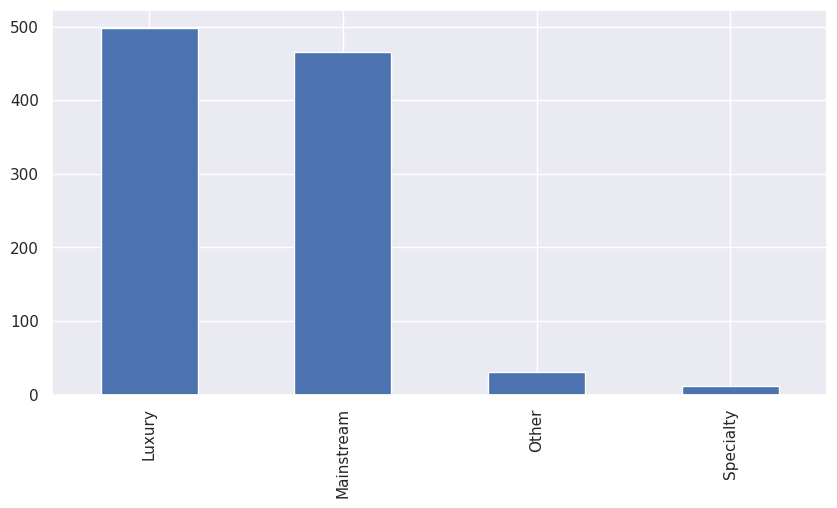

In [16]:
plt.figure(figsize=(10,5))
df['Car Make'].value_counts().plot(kind='bar')

In [17]:
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,28.0,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Mainstream,2022,Large,562,406,32.0,142700
4,Luxury,2021,Large,710,568,27.0,298000


# Exploratory Data Analysis

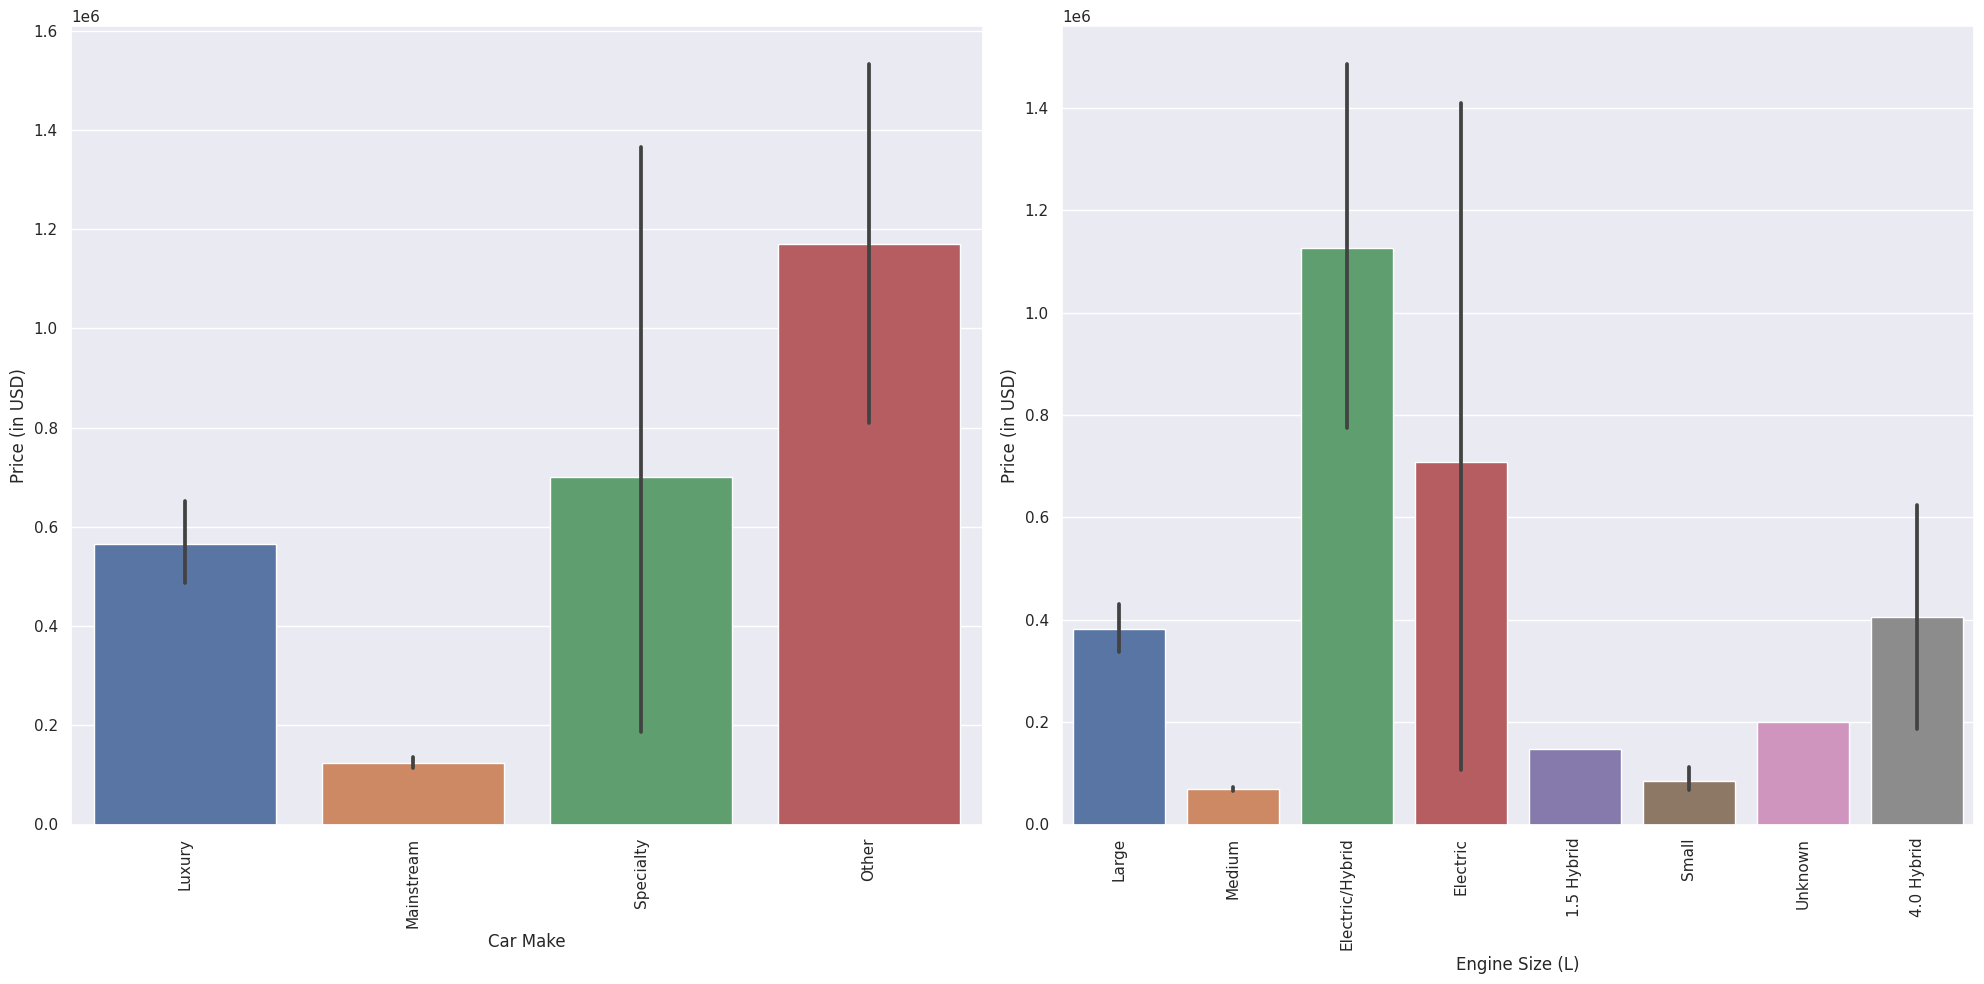

In [18]:
# list of categorical variables to plot
cat_vars = ['Car Make', 'Engine Size (L)']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price (in USD)', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

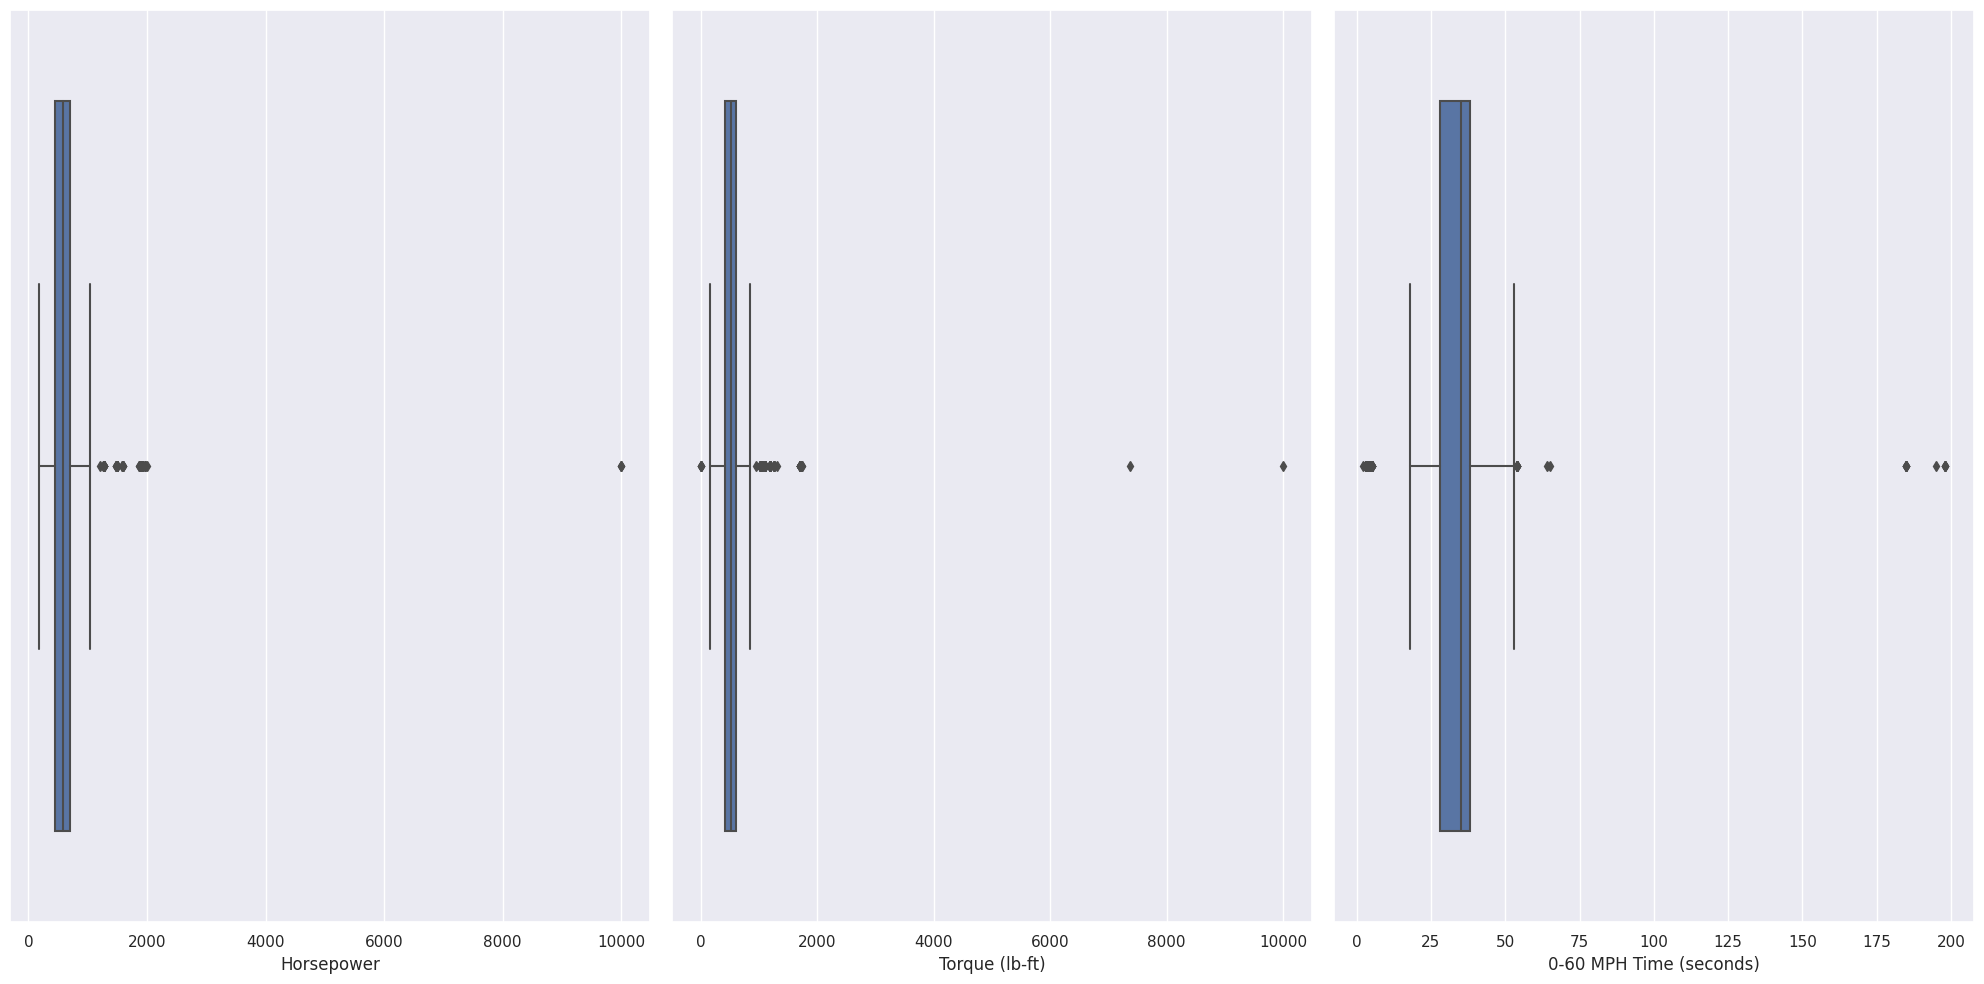

In [19]:
num_vars = ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

#Show the boxplot
for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

# adjust spacing between subplots
fig.tight_layout()

plt.show()

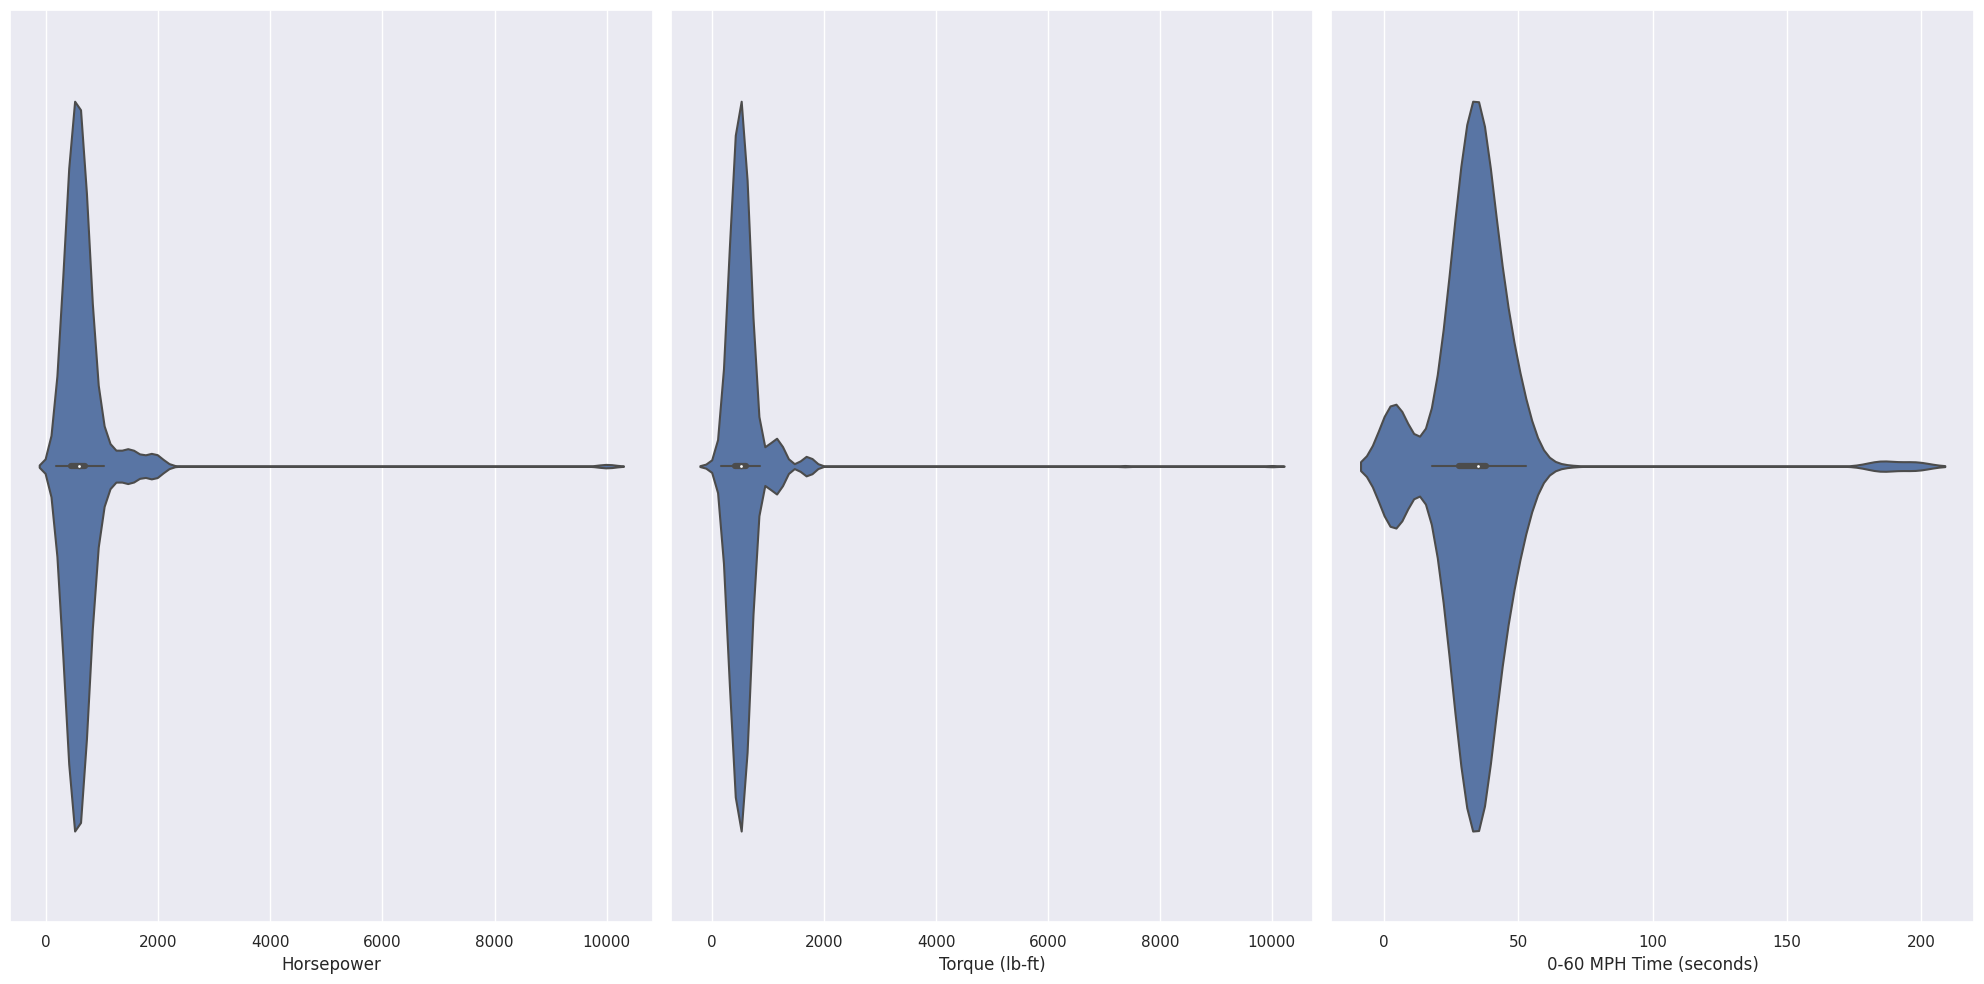

In [20]:
num_vars = ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

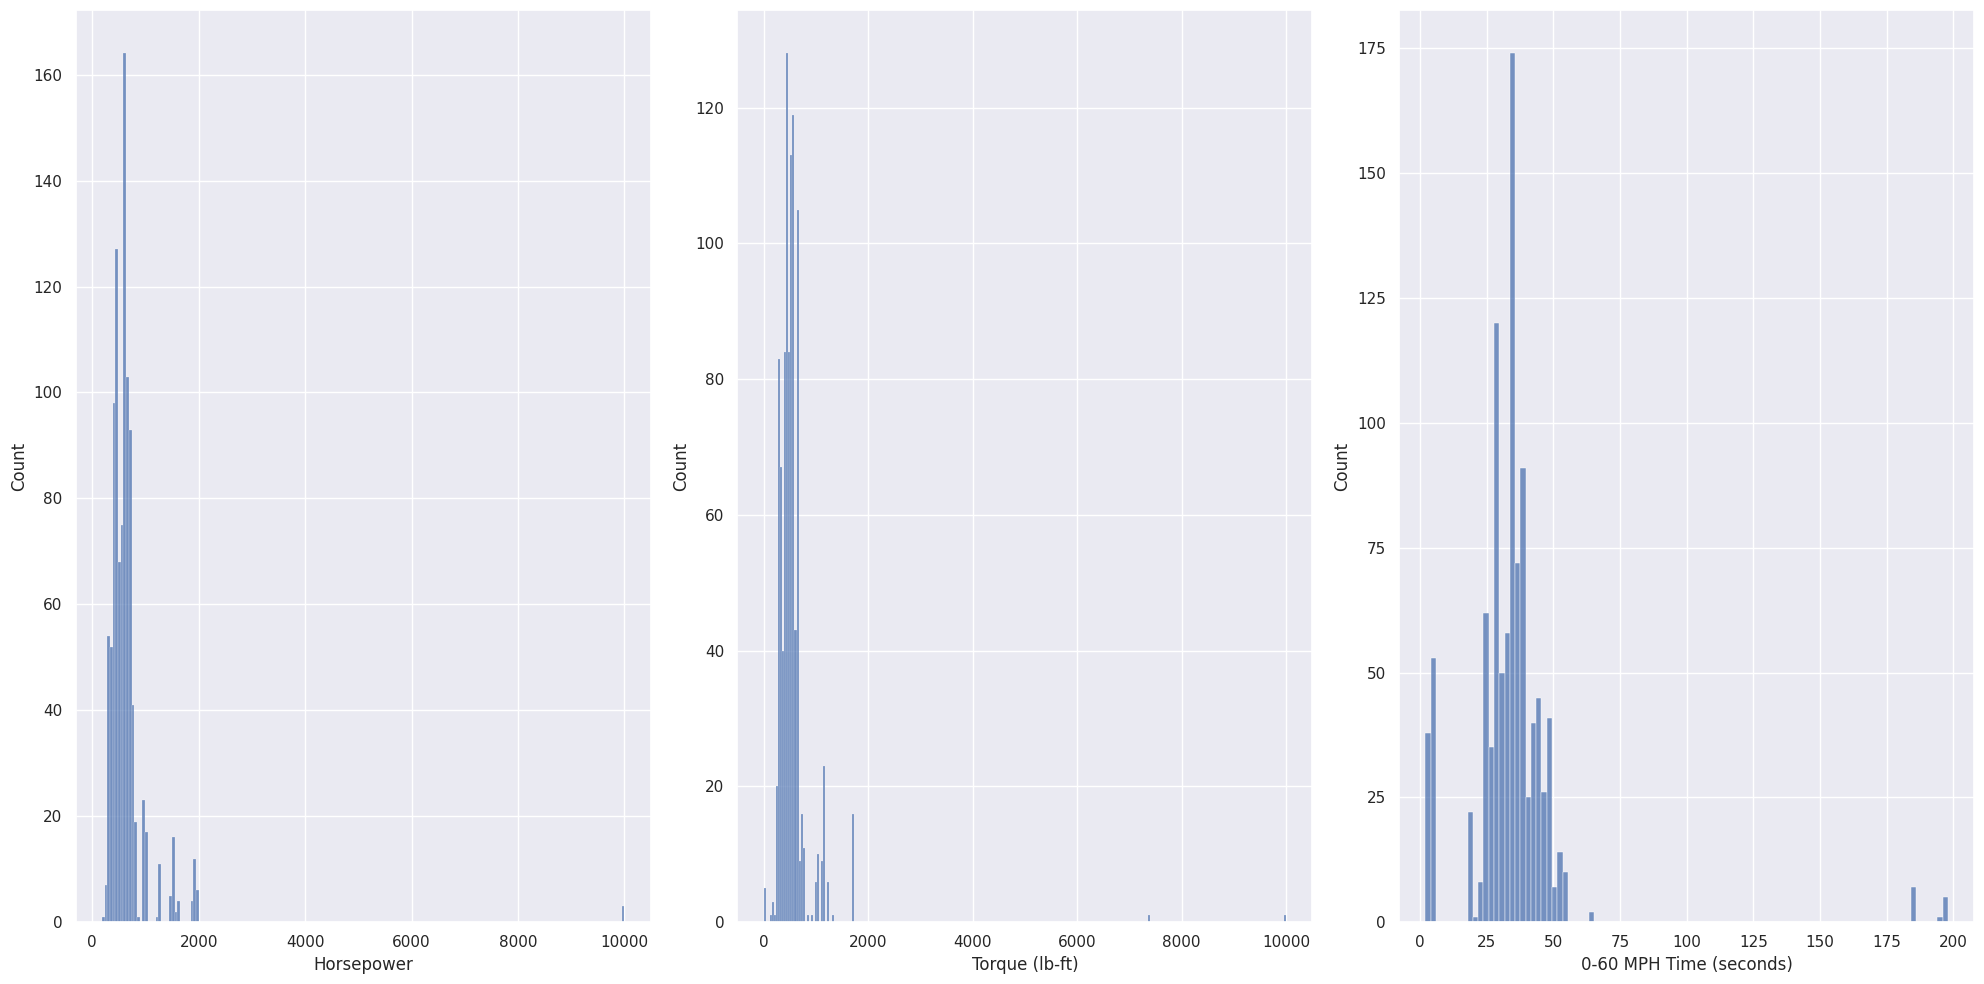

In [21]:
num_vars = ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

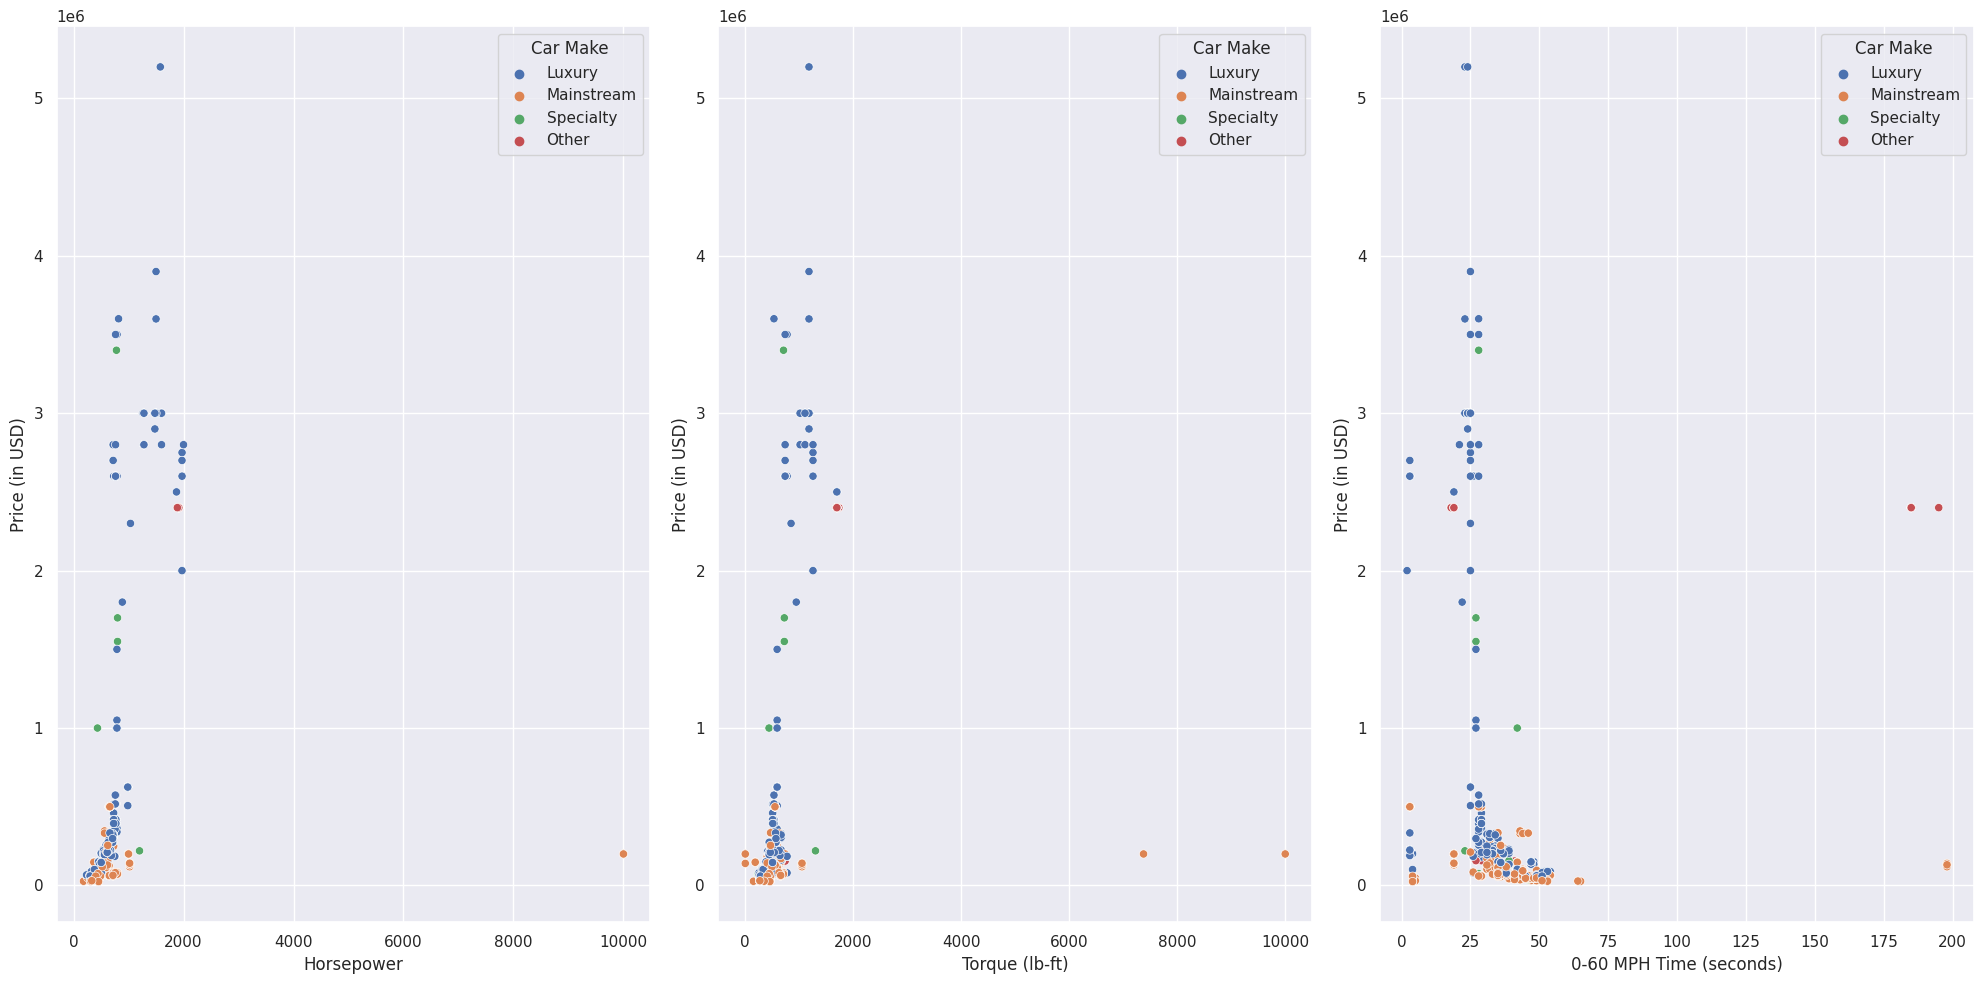

In [22]:
num_vars = ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price (in USD)', hue='Car Make', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

<ipython-input-23-0cafb399dcf7>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Price (in USD)', hue='Car Make', data=df, ci=None, estimator='mean', alpha=0.7)


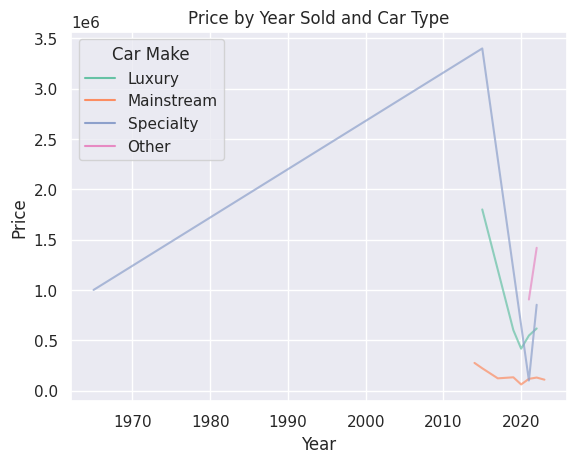

In [23]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year', y='Price (in USD)', hue='Car Make', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Car Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

# Data Preprocessing Part 2

In [24]:
df.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Luxury,2022,Large,379,331,4.0,101200
1,Luxury,2021,Large,630,443,28.0,274390
2,Luxury,2022,Large,661,561,3.0,333750
3,Mainstream,2022,Large,562,406,32.0,142700
4,Luxury,2021,Large,710,568,27.0,298000


In [25]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for Object datatype

In [26]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Car Make: ['Luxury' 'Mainstream' 'Specialty' 'Other']
Engine Size (L): ['Large' 'Medium' 'Electric/Hybrid' 'Electric' '1.5 Hybrid' 'Small'
 'Unknown' '4.0 Hybrid']


In [27]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Car Make: [0 1 3 2]
Engine Size (L): [4 5 3 2 0 6 7 1]


# Train  Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('Price (in USD)', axis=1)
y = df['Price (in USD)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Remove Outlier from Train data using IQR

In [29]:
# calculate the interquartile range for each feature
q1 = np.percentile(X_train, 25, axis=0)
q3 = np.percentile(X_train, 75, axis=0)
iqr = q3 - q1

# identify outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = np.logical_or(X_train < lower_bound, X_train > upper_bound)

# remove the outliers from the training set
X_train = X_train[~np.any(outliers, axis=1)]
y_train = y_train[~np.any(outliers, axis=1)]

In [30]:
X_train.shape

(560, 6)

In [31]:
y_train.shape

(560,)

In [32]:
X_train.head()

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
767,1,2022,4,444,406,38.0
764,0,2021,4,612,561,34.0
529,1,2021,4,720,590,31.0
252,0,2021,4,592,457,28.0
451,0,2021,4,626,664,33.0


In [33]:
y_train.head()

767     84595
764    235000
529    325000
252    256500
451    220000
Name: Price (in USD), dtype: int64

# Correlation heatmap

<Axes: >

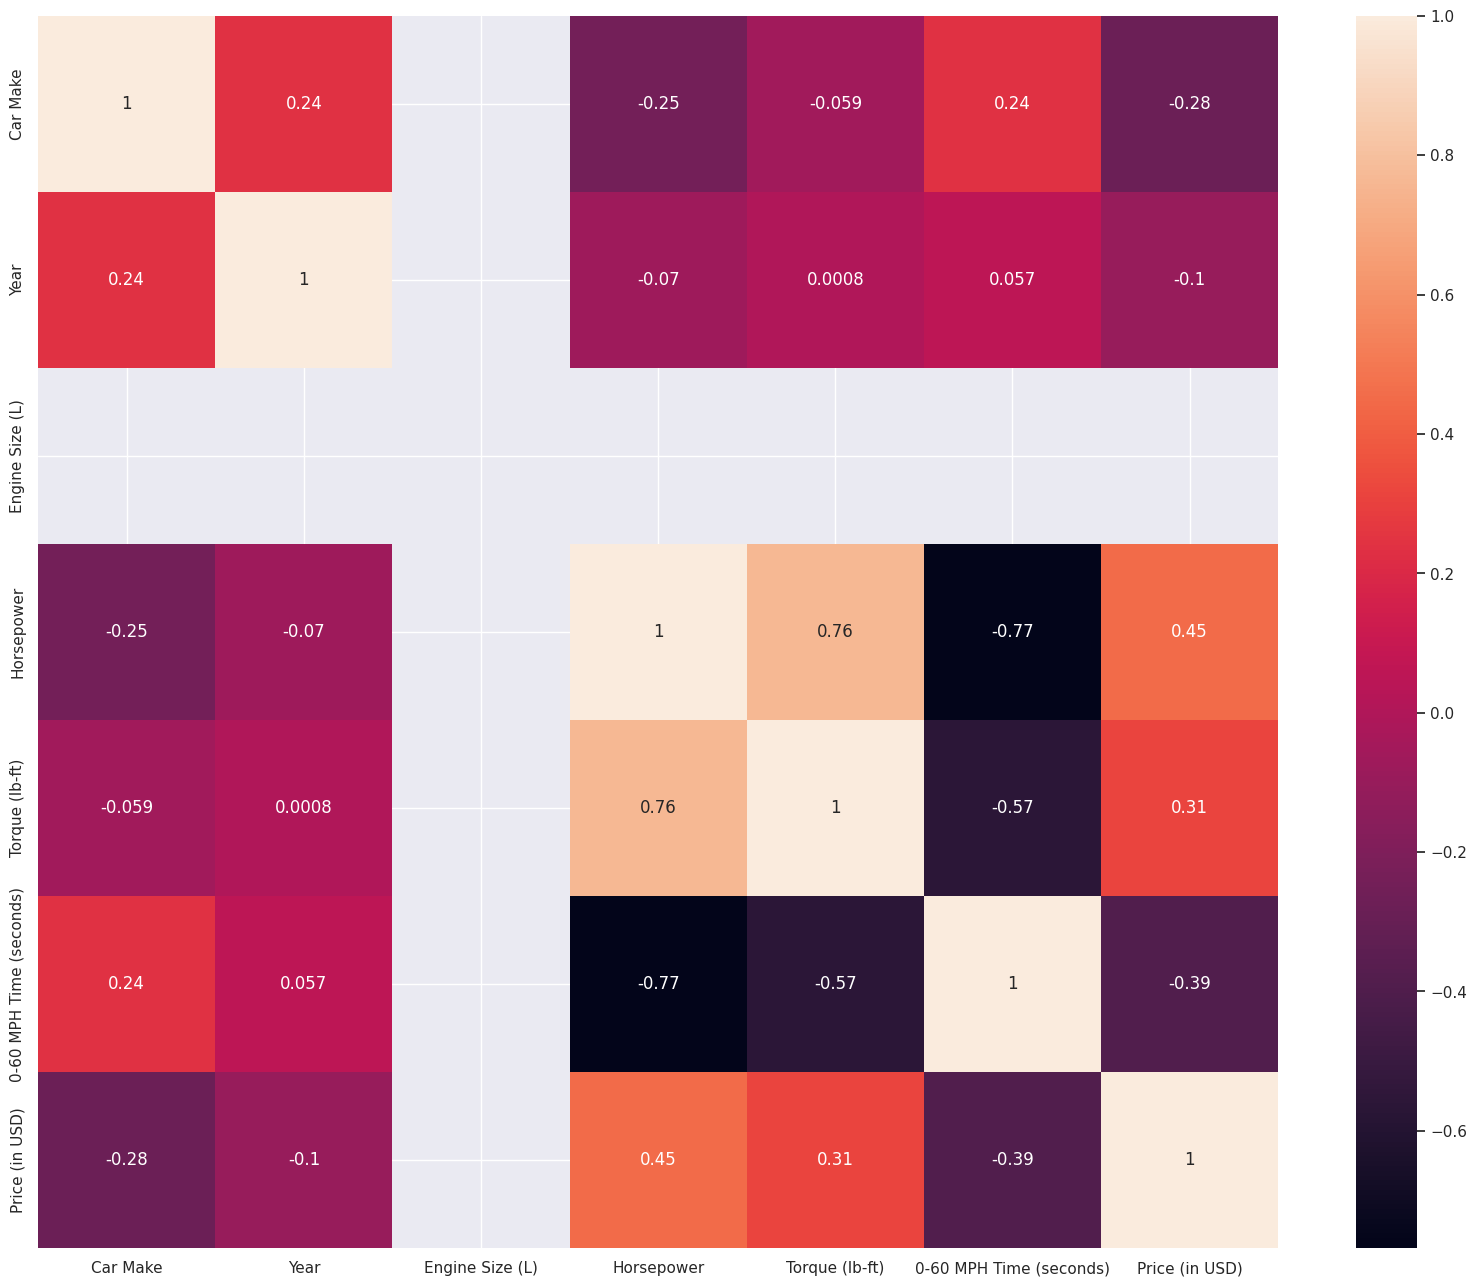

In [34]:
# concatenate X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)

#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(train_data.corr(), fmt='.2g', annot=True)

In [35]:
# Remove Engine Size (l) because it has 0 correlation
X_train.drop(columns='Engine Size (L)', inplace=True)
X_train.head()

,Car Make,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
767,1,2022,444,406,38.0
764,0,2021,612,561,34.0
529,1,2021,720,590,31.0
252,0,2021,592,457,28.0
451,0,2021,626,664,33.0


In [36]:
# Remove Engine Size (l) because it has 0 correlation
X_test.drop(columns='Engine Size (L)', inplace=True)
X_test.head()

,Car Make,Year,Horsepower,Torque (lb-ft),0-60 MPH Time (seconds)
799,0,2021,503,505,35.0
311,1,2021,650,650,35.0
85,0,2022,1500,1180,24.0
435,0,2021,1262,1106,25.0
204,0,2022,325,332,53.0


In [37]:
X_train.shape

(560, 5)

# Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 0}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [44]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=1, min_samples_split=6)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=6,
                      random_state=0)

In [45]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 236035.63646431145
MAPE is 0.8031919449888023
MSE is 446587710382.5396
R2 score is 0.24660092968005953
RMSE score is 668272.1828585563


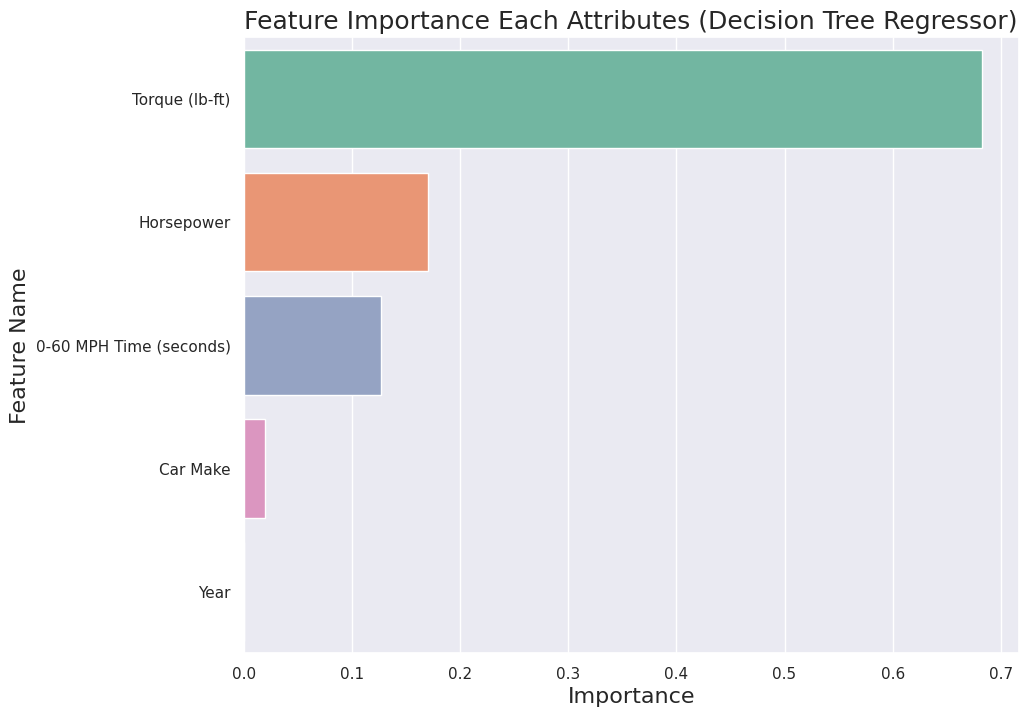

In [46]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
!pip install shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


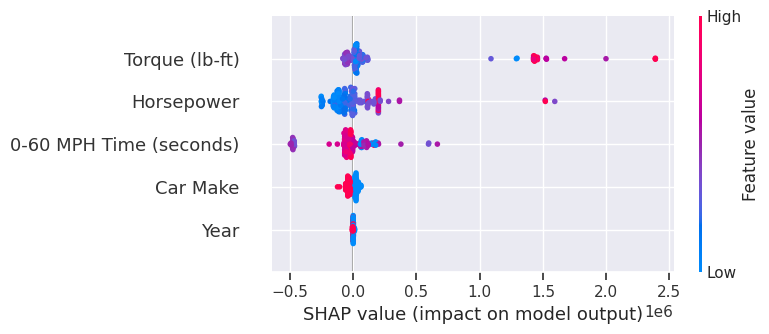

In [49]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

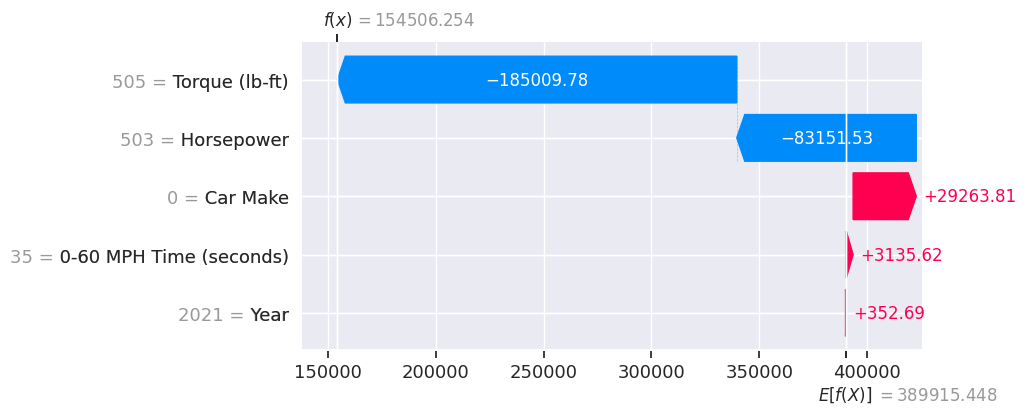

In [50]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=2, min_samples_leaf=2, 
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=2,
                      random_state=0)

In [53]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 179245.95197674824
MAPE is 0.6496436466127951
MSE is 232902640718.41104
R2 score is 0.6070903231035927
RMSE score is 482599.87641773286


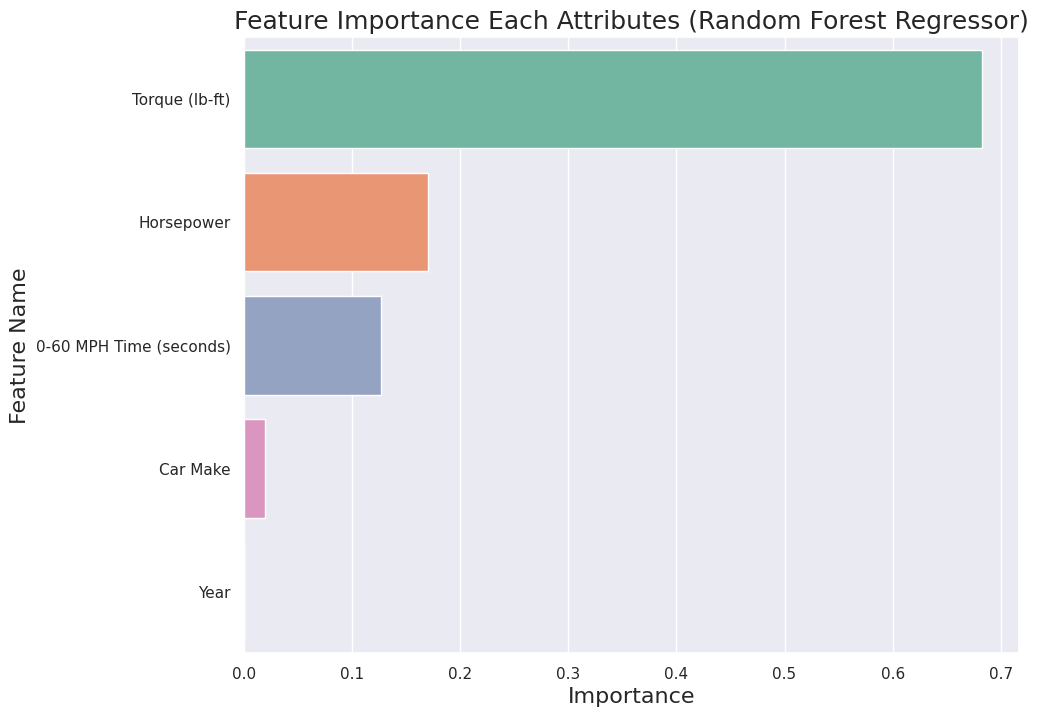

In [54]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

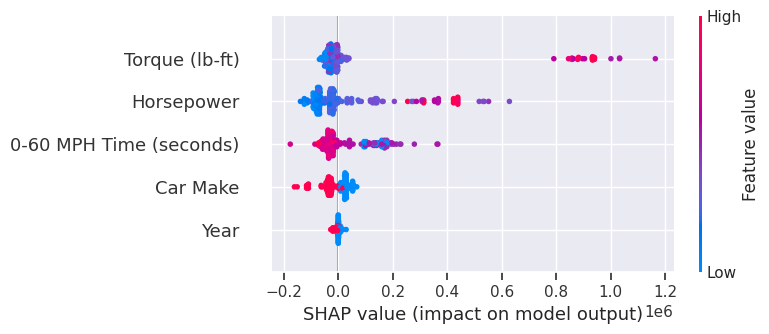

In [56]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

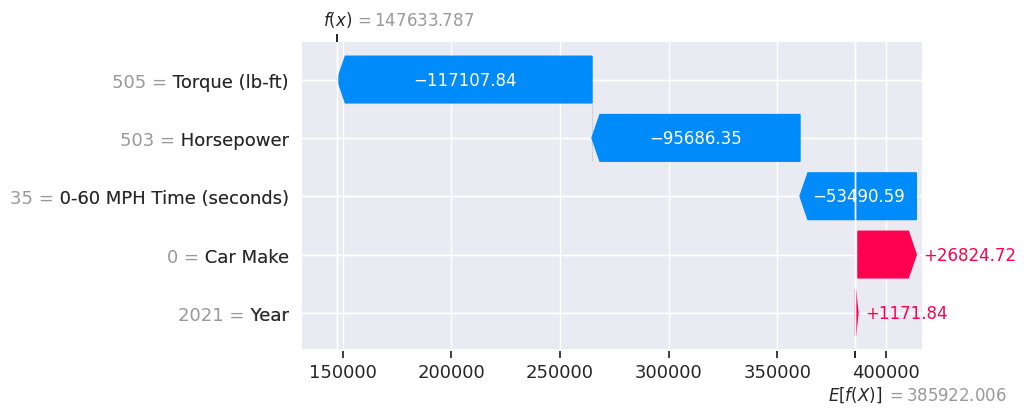

In [57]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

# AdaBoost Regressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define AdaBoostRegressor model
abr = AdaBoostRegressor()

# Define hyperparameters and possible values
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.01, 0.1, 1, 10],
          'random_state': [0, 42]
         }

# Perform GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(abr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}


In [59]:
from sklearn.ensemble import RandomForestRegressor
abr = AdaBoostRegressor(random_state=0, learning_rate=0.1, n_estimators=50)
abr.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=0)

In [60]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = abr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 246415.8167423268
MAPE is 0.8351811509347421
MSE is 408285348756.478
R2 score is 0.31121749428595646
RMSE score is 638972.1032693665


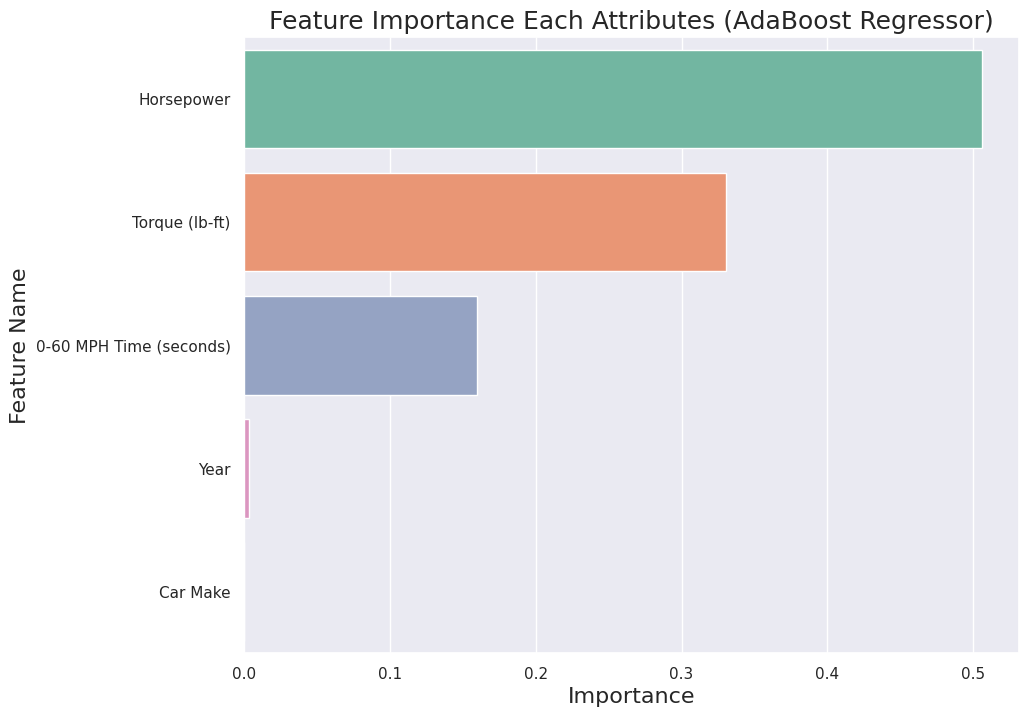

In [61]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": abr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()